In [10]:
import requests
import networkx as nx
import matplotlib.pyplot as plt
from typing import Dict

In [11]:
API_URL = "http://localhost:8000"

def get_versions():
    response = requests.get(f"{API_URL}/versions")
    return response.json()

def get_schema_timestamps(version):
    response = requests.get(f"{API_URL}/archive/schema/{version}")
    return response.json()

def get_schema_data(version, timestamp):
    response = requests.get(f"{API_URL}/archive/schema/{version}/{timestamp}")
    return response.json()

In [12]:
get_versions()

['default',
 'static_medium_100_v3',
 'static_medium_100_v2',
 'static_medium_100']

In [15]:
get_schema_timestamps("static_medium_100_v3")

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [13]:
def decompress_schema(compressed_data):
    decompressed = {
        "directed": compressed_data["directed"],
        "multigraph": compressed_data["multigraph"],
        "graph": compressed_data["graph"],
        "nodes": [],
        "links": []
    }
    
    # Decompress nodes
    for node_type, keys in compressed_data["node_types"].items():
        for values in compressed_data["node_values"][node_type]:
            node = dict(zip(keys, values))
            decompressed["nodes"].append(node)
    
    # Decompress links
    for values in compressed_data["link_values"]:
        rel_type = values[0]  # Assuming relationship_type is always first
        keys = compressed_data["relationship_types"][rel_type]
        link = dict(zip(keys, values))
        decompressed["links"].append(link)
    
    return decompressed

/Users/dev/LAM/graph-server/venv/lib/python3.12/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


Nodes:  338
Edges:  345


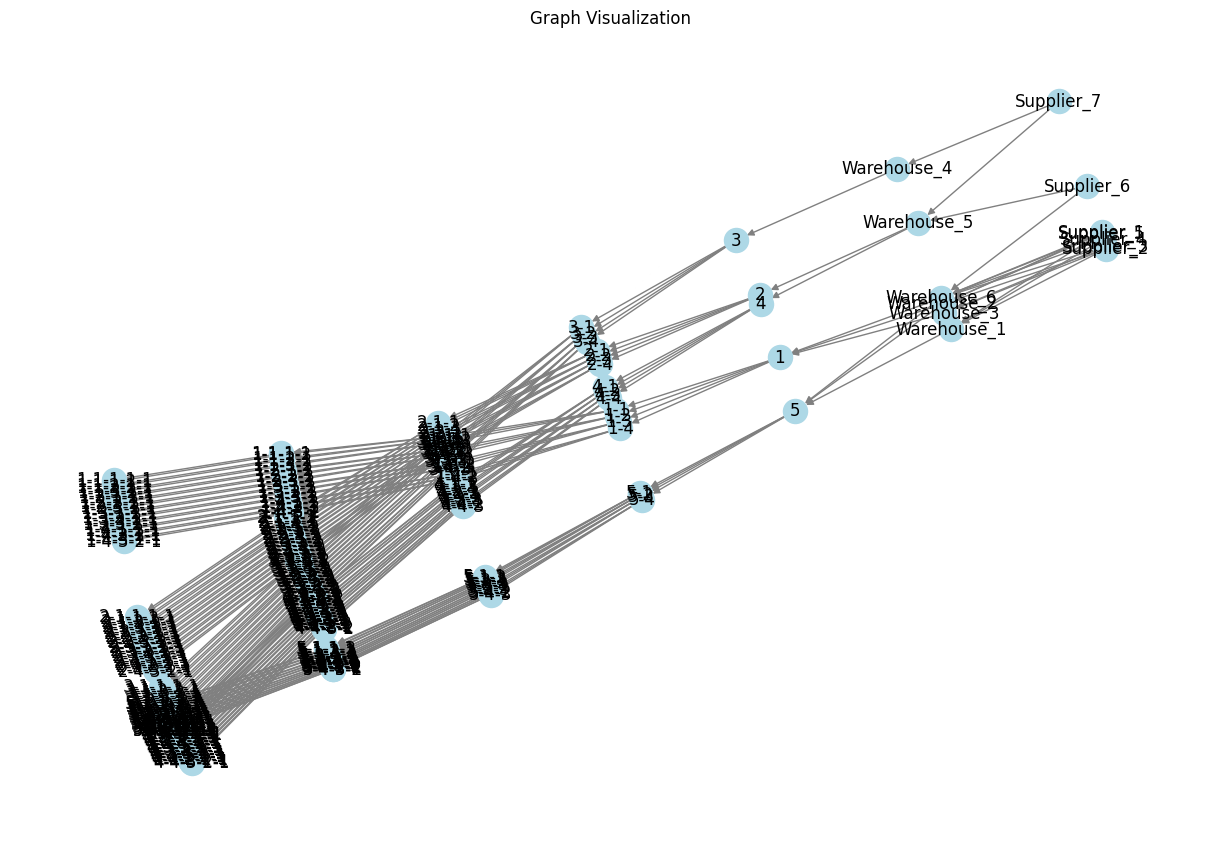

In [14]:
from networkx.readwrite import json_graph
G = json_graph.node_link_graph(decompress_schema(get_schema_data("static_medium_100_v3", 1)))

print("Nodes: ", G.number_of_nodes())
print("Edges: ", G.number_of_edges())

plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(G)
# pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=1, arrows=True)
plt.title("Graph Visualization")
plt.show()  
